# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

![title](equatorsign.png)

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key
import citipy
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
#save lats & lngs
lats_Saved_list= []
long_Saved_list = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lats_Saved_list.append(lat_lng[0])
        long_Saved_list.append(lat_lng[1])
        

#create df
list_df = pd.DataFrame({"City":cities, "Lat":lats_Saved_list,"Long":long_Saved_list})
list_df.to_csv("ListofCities,csv")
list_df.head()

,City,Lat,Long
0,pacifica,34.239585,-131.175675
1,xinon neron,40.621241,21.626056
2,tiksi,78.400680,123.689687
3,butaritari,10.848033,164.766759
4,ushuaia,-56.197301,-51.527553


In [4]:
# Print the city count to confirm sufficient count
len(list_df)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
#define URL
url_base = "http://api.openweathermap.org/data/2.5/weather?"
units =  "standard"
api_key = weather_api_key

#query URL
query_url = f"{url_base}appid={api_key}&units{units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=


In [19]:
#make list to store parameters to request/store
L_city = []
L_lat = []
L_lng = []
L_cloudiness = []
L_country = []
L_date = []
L_humidity = []
L_tempMaX = []
wind_speed_list = []
index_counter = 0
set_counter = 1

#loop throgh "cities"
for index, city in enumerate(cities, start = 1):
    try:
        print(query_url+city)
        response = requests.get(query_url + city).json()
        L_city.append(response["name"])
        L_cloudiness.append(response["clouds"]["all"])
        L_country.append(response["sys"]["country"])
        L_date.append(response["dt"])
        L_humidity.append(response["main"]["humidity"])
        L_lat.append(response["coord"]["lat"])
        L_lng.append(response["coord"]["lon"])
        L_tempMaX.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
         # limit query time
        time.sleep(0.01)
            
        
    except(KeyError, IndexError):
        print("#####City not found#####")

print("Done!!")


http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=pacifica
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=xinon neron
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=tiksi
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=butaritari
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=pisco
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=xuddur
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=micheweni
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=san patricio


http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=daru
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=thompson
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=hamilton
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=shimoda
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=sur
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=ghanzi
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=alotau
#####City no

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=fortuna
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=bilma
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=san julian
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=ahuimanu
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=tiznit
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=portobelo
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=poum
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=upernavik
http://a

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=la ronge
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=esperance
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=san vicente
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=makoshyne
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=fort smith
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=hailar
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=barbar
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=bad liebenwerda
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=faanui
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=ilhabela
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=chalmette
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=cidreira
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=jamestown
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandar

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=pong
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=dukhovnitskoye
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=casa nova
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=grindavik
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=mananjary
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=launceston
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=iberia
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=kuda

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=bargal
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=bababe
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=gwadar
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=puerto plata
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=lompoc
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=arauca
http://api.openweathermap.org/data/2.5/weather?appid=04fd

#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=umm lajj
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=turayf
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=hunchun
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=port hardy
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=aflu
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=krasnyy chikoy
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=azul
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=havoysund
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=sainte-maxime
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=mut
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=chara
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=nuuk
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=vanavara
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=kongsberg
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=batemans bay
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=roald
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=lewistown
http:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [20]:
# Create a panda data frame using data retrieved
weather_byCity = pd.DataFrame({ 
                "City" : L_city,
                "Country" : L_country,
                "Lat" : L_lat,
                "Lng" : L_lng,    
                "Cloudiness" : L_cloudiness,                
                "Date" : L_date,
                "Humidity" : L_humidity,                
                "Max Temp" : L_tempMaX,
                "Wind Speed" : wind_speed_list
})
#export to csv
weather_byCity .to_csv('WeaterBycity.csv')

print(weather_byCity)

                   City Country      Lat       Lng  Cloudiness        Date  \
0              Pacifica      US  37.6138 -122.4869          40  1619747194   
1            Ksino Nero      GR  40.6833   21.6167           3  1619747195   
2                 Tiksi      RU  71.6872  128.8694          78  1619747186   
3            Butaritari      KI   3.0707  172.7902         100  1619746924   
4               Ushuaia      AR -54.8000  -68.3000          75  1619747196   
..                  ...     ...      ...       ...         ...         ...   
568              Rakaia      NZ -43.7500  172.0167         100  1619747469   
569  Conceição da Barra      BR -18.5933  -39.7322          95  1619747470   
570             Taksimo      RU  56.3444  114.8794          89  1619747470   
571            Strugari      RO  46.5333   26.7167          90  1619747471   
572        Port Hedland      AU -20.3167  118.5667           0  1619747471   

     Humidity  Max Temp  Wind Speed  
0          82    287.04  

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
checkAbove100= weather_byCity['Humidity'].describe(include='all')
checkAbove100

count    573.000000
mean      70.675393
std       22.255102
min        1.000000
25%       61.000000
50%       76.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

No cities above 100%

In [22]:
#make df with <=100% humidity
Lessthan100 = weather_byCity.loc[weather_byCity['Humidity']<=100]
len(Lessthan100)

573

In [23]:
#  Get the indices of cities that have humidity over 100%.
index100 = weather_byCity
bool_arr = index
output =np.where



In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Lessthan100

In [25]:
clean_city_data


,City,Country,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,Pacifica,US,37.6138,-122.4869,40,1619747194,82,287.04,5.66
1,Ksino Nero,GR,40.6833,21.6167,3,1619747195,82,288.71,2.57
2,Tiksi,RU,71.6872,128.8694,78,1619747186,83,273.19,2.26
3,Butaritari,KI,3.0707,172.7902,100,1619746924,71,301.97,5.90
4,Ushuaia,AR,-54.8000,-68.3000,75,1619747196,70,277.15,1.55
...,...,...,...,...,...,...,...,...,...
568,Rakaia,NZ,-43.7500,172.0167,100,1619747469,28,287.59,10.28
569,Conceição da Barra,BR,-18.5933,-39.7322,95,1619747470,80,295.39,3.04
570,Taksimo,RU,56.3444,114.8794,89,1619747470,64,274.91,1.24
571,Strugari,RO,46.5333,26.7167,90,1619747471,93,282.59,4.63


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

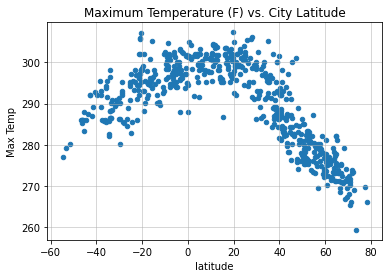

In [26]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp",  
                                      title="Maximum Temperature (F) vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("TempmaxVlatitude_All_Cities.png")

## Latitude vs. Humidity Plot

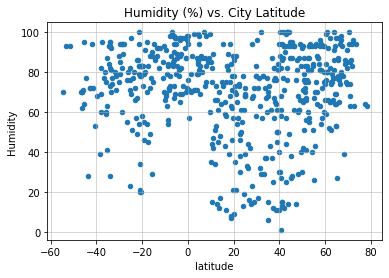

In [27]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Humidity",  
                                      title="Humidity (%) vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("HumidityVSLatitude_All_Cities.png")

## Latitude vs. Cloudiness Plot

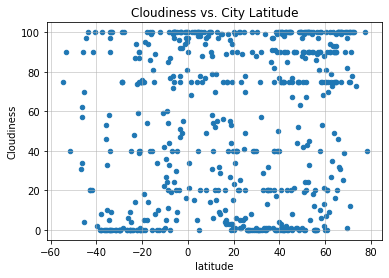

In [28]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness",  
                                      title="Cloudiness vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("CloudinessVSLatitude_All_Cities.png")

## Latitude vs. Wind Speed Plot

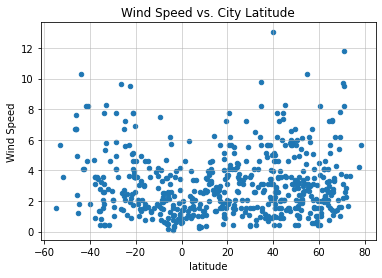

In [29]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed",  
                                      title="Wind Speed vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("windspeedVSLatitude_All_Cities.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [30]:
#northem hemisphere is define by lat >=0
#create df for northemhemisfere
North_df = clean_city_data.loc[(clean_city_data['Lat']>=0)]
North_df

,City,Country,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,Pacifica,US,37.6138,-122.4869,40,1619747194,82,287.04,5.66
1,Ksino Nero,GR,40.6833,21.6167,3,1619747195,82,288.71,2.57
2,Tiksi,RU,71.6872,128.8694,78,1619747186,83,273.19,2.26
3,Butaritari,KI,3.0707,172.7902,100,1619746924,71,301.97,5.90
6,Oddur,SO,4.1213,43.8894,100,1619747096,87,296.35,3.94
...,...,...,...,...,...,...,...,...,...
562,Ţahţā,EG,26.7693,31.5021,0,1619747466,16,295.15,3.09
564,Goderich,CA,43.7501,-81.7165,100,1619747467,93,278.15,2.06
565,Straumen,NO,63.8709,11.2999,75,1619747468,86,276.48,2.06
570,Taksimo,RU,56.3444,114.8794,89,1619747470,64,274.91,1.24


In [31]:
South_df = clean_city_data.loc[(clean_city_data['Lat']<0)]
South_df

,City,Country,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
4,Ushuaia,AR,-54.8000,-68.3000,75,1619747196,70,277.15,1.55
5,Pisco,PE,-13.7000,-76.2167,0,1619747008,88,292.15,3.60
7,Micheweni,TZ,-4.9667,39.8333,100,1619747197,87,298.41,3.70
14,Rikitea,PF,-23.1203,-134.9692,87,1619747022,66,298.03,5.67
15,Vaini,TO,-21.2000,-175.2000,75,1619747042,100,297.15,5.14
...,...,...,...,...,...,...,...,...,...
566,Mâncio Lima,BR,-7.6142,-72.8958,19,1619747468,88,294.82,0.66
567,Viedma,AR,-40.8135,-62.9967,100,1619747469,53,292.89,8.21
568,Rakaia,NZ,-43.7500,172.0167,100,1619747469,28,287.59,10.28
569,Conceição da Barra,BR,-18.5933,-39.7322,95,1619747470,80,295.39,3.04


In [32]:
#create variables for axis
x_N=North_df['Lat']
y_N=North_df['Max Temp']

linear regression equation: y = -0.5x + 307.31
r^2= -0.8963815552271417


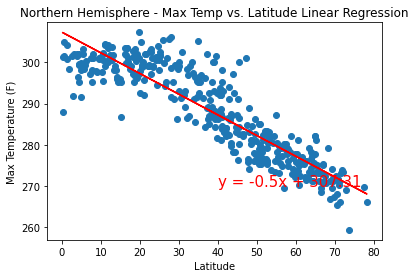

In [34]:
#create linear regresion funtion
x_val = pd.to_numeric(x_N).astype(float)
y_val = pd.to_numeric(y_N).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,270),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

 


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:
#create variables for axis
x_S=South_df['Lat']
y_S=South_df['Max Temp']

linear regression equation: y = 0.3x + 300.01
r^2= 0.6883448121763373


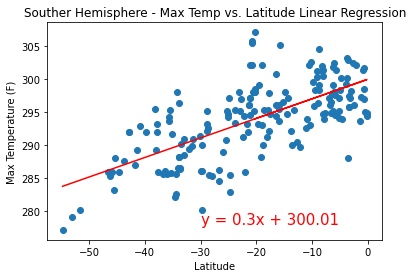

In [36]:
#create linear regresion funtion
x_val = pd.to_numeric(x_S).astype(float)
y_val = pd.to_numeric(y_S).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,278),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Souther Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [37]:
#create variables for axis
x_NH=North_df['Lat']
y_NH=North_df['Humidity']

linear regression equation: y = 0.21x + 59.48
r^2= 0.17943224933027513


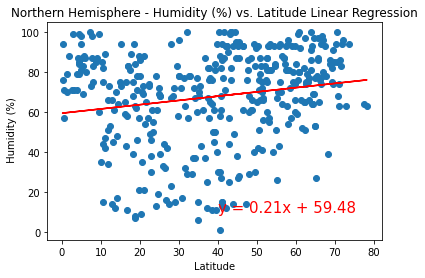

In [38]:
#create linear regresion funtion
x_val = pd.to_numeric(x_NH).astype(float)
y_val = pd.to_numeric(y_NH).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [39]:
#create variables for axis
x_SH=South_df['Lat']
y_SH=South_df['Humidity']

linear regression equation: y = 0.27x + 82.22
r^2= 0.21305750330686676


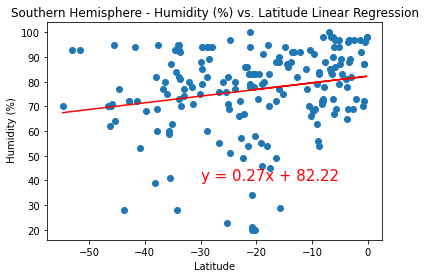

In [41]:
#create linear regresion funtion
x_val = pd.to_numeric(x_SH).astype(float)
y_val = pd.to_numeric(y_SH).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [42]:
#create variables for axis
x_NC=North_df['Lat']
y_NC=North_df['Cloudiness']

linear regression equation: y = 0.28x + 45.77
r^2= 0.1432796915161685


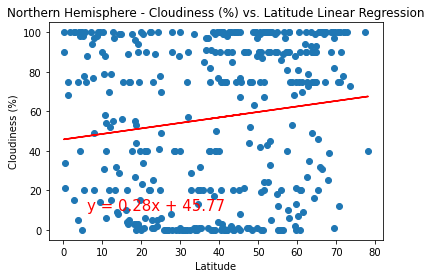

In [43]:
#create linear regresion funtion
x_val = pd.to_numeric(x_NC).astype(float)
y_val = pd.to_numeric(y_NC).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [44]:
#create variables for axis
x_SC=South_df['Lat']
y_SC=South_df['Cloudiness']

linear regression equation: y = 0.71x + 62.54
r^2= 0.24667832515339788


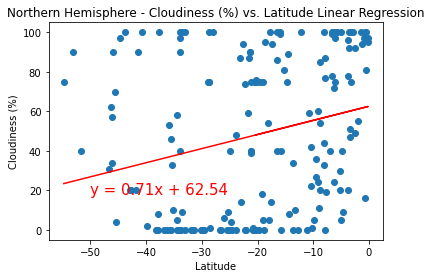

In [45]:
#create linear regresion funtion
x_val = pd.to_numeric(x_SC).astype(float)
y_val = pd.to_numeric(y_SC).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [46]:
#create variables for axis
x_NW=North_df['Lat']
y_NW=North_df['Wind Speed']

linear regression equation: y = 0.02x + 2.42
r^2= 0.17170824276237034


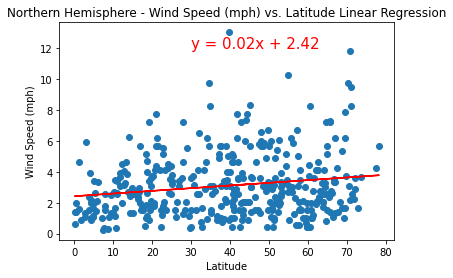

In [47]:
#create linear regresion funtion
x_val = pd.to_numeric(x_NW).astype(float)
y_val = pd.to_numeric(y_NW).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [48]:
#create variables for axis
x_SW=South_df['Lat']
y_SW=South_df['Wind Speed']

linear regression equation: y = -0.05x + 1.96
r^2= -0.3431890705600971


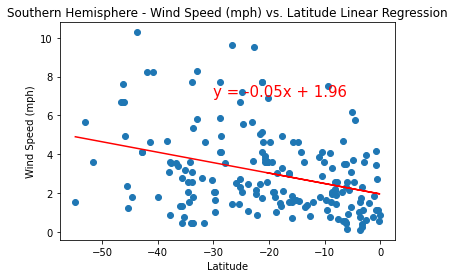

In [49]:
#create linear regresion funtion
x_val = pd.to_numeric(x_SW).astype(float)
y_val = pd.to_numeric(y_SW).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()

# Three observable trends based on the data.